In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from peakfinder import find_peaks

In [2]:
# http://timeseriesclassification.com/description.php?Dataset=ECG200

In [3]:
df = pd.read_csv("./data/ECG200/ECG200/ECG200_TRAIN.txt", sep=",", header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-1,0.50206,0.54216,0.72238,1.42890,2.136500,2.28110,1.936300,1.46890,1.00880,...,0.931040,0.61030,0.63889,0.684680,0.583240,0.64052,0.70859,0.705010,0.71382,0.43376
1,1,0.14765,0.80467,0.36777,0.24389,0.026614,-0.27440,0.096731,-0.74773,-1.60980,...,-0.533500,-0.40023,0.17608,1.111800,2.438400,2.73490,1.73610,0.036857,-1.26510,-0.20802
2,-1,0.31665,0.24320,0.37047,1.06370,1.678200,1.75960,1.697700,1.61220,1.16820,...,0.764230,0.61062,0.55290,0.566790,0.604000,0.77707,0.81235,0.748850,0.81804,0.53935
3,-1,1.16890,2.07590,1.76010,1.60640,1.949000,1.30280,0.459330,0.51641,0.85218,...,0.419010,0.72389,1.32390,2.136500,1.746600,1.47020,1.89350,1.256900,0.80041,0.73154
4,1,0.64866,0.75203,2.63620,3.45570,2.118200,0.52062,-0.188630,0.78082,0.93377,...,-0.097869,-0.13679,-0.34024,-0.089441,-0.080297,-0.19258,-0.30470,-0.454560,0.31459,0.58219


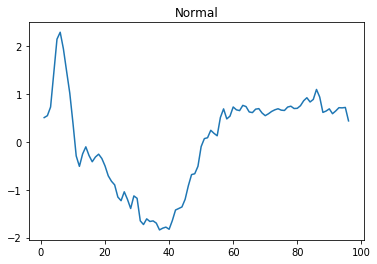

In [5]:
df.loc[0,1:].plot()
plt.title("Normal")
plt.show()

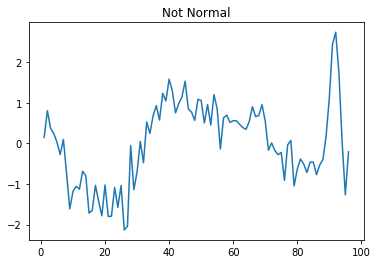

In [6]:
df.loc[1,1:].plot()
plt.title("Not Normal")
plt.show()

### How do they differ on their FF?

In [7]:
normal = df.loc[0,1:].values
event =  df.loc[1,1:].values

In [8]:
from scipy.fftpack import fft

C:\Users\HP\Anaconda3\envs\cnb\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Normal')

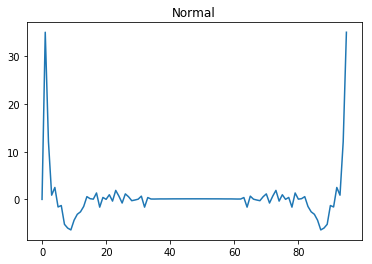

In [9]:
fft_vals = fft(normal)
f_vals = range(len(normal))

plt.plot(f_vals, fft_vals)
plt.title("Normal")

C:\Users\HP\Anaconda3\envs\cnb\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Event')

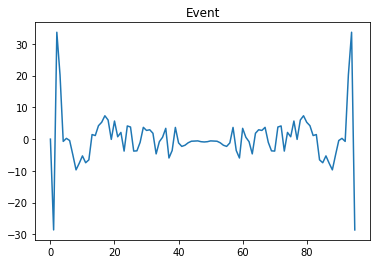

In [10]:
fft_vals = fft(event)
f_vals = range(len(event))

plt.plot(f_vals, fft_vals)
plt.title("Event")

## How do they differ in ther PSD?

Closely related to the Fourier Transform is the concept of Power Spectral Density.

Similar to the FFT, it describes the frequency spectrum of a signal. But in addition to the FFT it also takes the power distribution at each frequency (bin) into account. Generally speaking the locations of the peaks in the frequency spectrum will be the same as in the FFT-case, but the height and width of the peaks will differ. 

Calculation of the Power Spectral density is a bit easier, since SciPy contain a function which not only return a vector of amplitudes, but also a vector containing the tick-values of the frequency-axis.

C:\Users\HP\Anaconda3\envs\cnb\lib\site-packages\scipy\signal\spectral.py:1773: UserWarning: nperseg = 256 is greater than input length  = 96, using nperseg = 96
  .format(nperseg, input_length))


Text(0.5,1,'Normal')

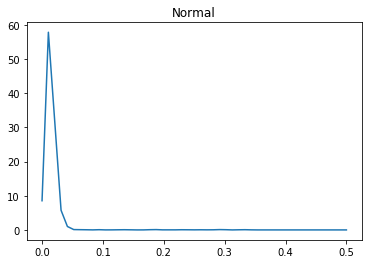

In [11]:
from scipy.signal import welch
f_vals, psd_vals = welch(normal)

plt.plot(f_vals, psd_vals)
plt.title("Normal")

C:\Users\HP\Anaconda3\envs\cnb\lib\site-packages\scipy\signal\spectral.py:1773: UserWarning: nperseg = 256 is greater than input length  = 96, using nperseg = 96
  .format(nperseg, input_length))


Text(0.5,1,'Event')

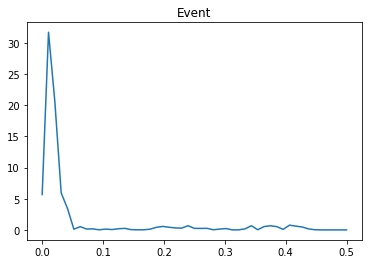

In [12]:
from scipy.signal import welch
f_vals, psd_vals = welch(event)

plt.plot(f_vals, psd_vals)
plt.title("Event")

## Savitzky-Golay

Another idea is to fit the signal locally by smooth polynomials. In this case, we can transform the signal to their approximation and hope to see some differences.

In [13]:
from scipy.signal import savgol_filter

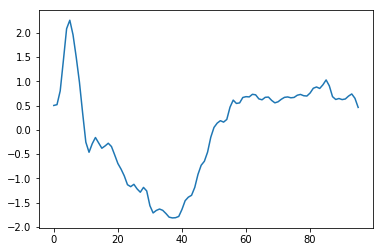

In [14]:
plt.plot(savgol_filter(normal,5,2)) #window length of 5, second order polynomials

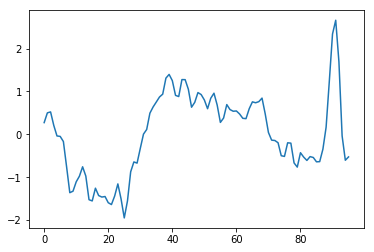

In [15]:
plt.plot(savgol_filter(event,5,2))

### Find peaks

In [16]:
from scipy.signal import find_peaks_cwt

In [17]:
peaks_normal_idxs = find_peaks_cwt(normal, np.arange(1,len(normal)))

In [18]:
peaks_event_idxs = find_peaks_cwt(event, np.arange(1,len(event)))

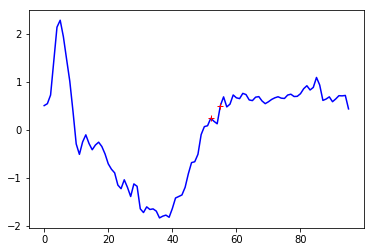

In [19]:
plt.plot(np.arange(0, len(normal)), normal, '-b+', mec = 'r', markevery= list(peaks_normal_idxs))

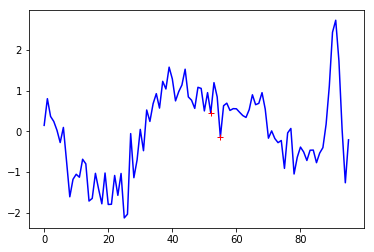

In [20]:
plt.plot(np.arange(0, len(event)), event, '-b+', mec='r', markevery= list(peaks_normal_idxs))

## Using the `find_peaks` function (included)

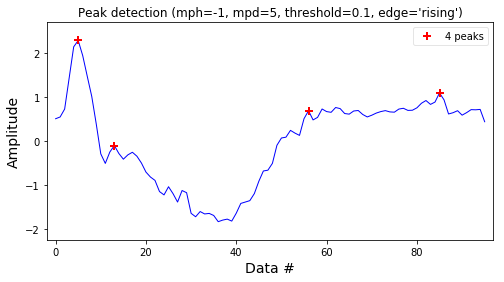

In [21]:
# Credit to Marcos Duarte: http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb
peaks_normal = find_peaks(normal, show=True, 
                          mpd = 5, threshold=0.1, mph=-1)

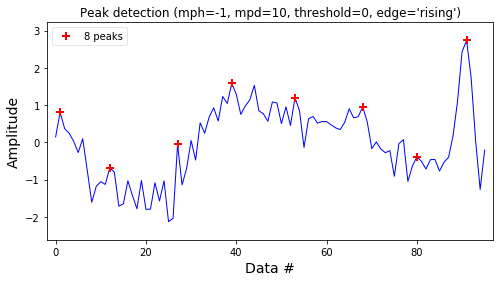

In [22]:
peaks_event = find_peaks(event, show=True, edge ='rising', kpsh=False, mpd=10, mph = -1)

In [23]:
features = list(peaks_normal) + list(peaks_event)

In [24]:
X = df.iloc[0:,features]

In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=42, n_init=10)

km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [26]:
y_preds = km.predict(X)

In [27]:
y = df.iloc[0:,0]

In [28]:
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [31]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, y_preds)

0.013372073190446818

<div class="alert alert-success">
    <h2>Exercise</h2>:
     <ul>
      <li>Can you improve the clustering results using FFT? How about PSD?</li>
      <li>What happens if you change the clustering algorithms and try to solve the problem as a classification problem?</li>
    </ul>
</div>
